# Basic Sampling

In computational statistical mechanics, sampling distributions with known probabilities (stationary probabilities) can be done using algorithms such as rejection or rejection-free methods like tower sampling. Rejection algorithms randomly sample potential outcomes and discard those that don't meet criteria, while tower sampling accumulates probabilities to select an outcome without rejection, allowing efficient sampling even from large populations.

## Finite distributions

<img src="./imgs/basic_sampling.png" alt="Basic Sampling" width="600"/>   

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def metropolis_pebble(num_iter, activities, probabilities):
    scores = dict()
    for i in activities:
        scores[i] = 0

    current_pos = activities[0]
    current_pos_prob = probabilities[0]
    for i in range(num_iter):
        new_idx = random.randint(0, len(activities)-1)
        new_pos = activities[new_idx]
        new_pos_prob = probabilities[new_idx]
        gamma = min(1, new_pos_prob/current_pos_prob)

        if (random.uniform(0, 1) <= gamma):
            current_pos = new_pos
            current_pos_prob = new_pos_prob

        scores[current_pos] += 1

    return scores

<img src="./imgs/reject_finite.png" alt="Rejection algorithm for finite distribution" width="250"/>

In [3]:
def reject_finite(num_iter, activities, probabilities):
    scores = dict()
    for i in activities:
        scores[i] = 0

    max_prob = max(probabilities)
    accept_count = 0
    for i in range(num_iter):
        k = random.randint(0, len(activities)-1)
        gamma = random.uniform(0, max_prob)
        if (gamma <= probabilities[k]):
            scores[activities[k]] += 1
            accept_count += 1

    return scores, accept_count

<img src="./imgs/tower_sample.png" alt="Rejection-free algorithm for finite distribution" width="300"/>   

In [4]:
def tower_sample(num_iter, activities, probabilities):
    scores = dict()
    for i in activities:
        scores[i] = 0
        
    cum_prob = [0]
    for i in range(len(probabilities)):
        cum_prob.append(cum_prob[i] + probabilities[i])

    for i in range(num_iter):
        gamma = random.uniform(0, cum_prob[-1])
        for i in range(1, len(cum_prob)):
            if gamma <= cum_prob[i]:
                scores[activities[i-1]] += 1
                break

    return scores

In [5]:
activities = ["trip", "novel", "cricket", "movie", "video games", "studying", "football"]
probabilities = [0.1, 0.15, 0.25, 0.2, 0.1, 0.15, 0.05]
num_iter = 1000000

In [6]:
scores = metropolis_pebble(num_iter, activities, probabilities)

for i in scores:
    print(i, ":", f"{scores[i]/num_iter:.2f}")

trip : 0.10
novel : 0.15
cricket : 0.25
movie : 0.20
video games : 0.10
studying : 0.15
football : 0.05


In [7]:
scores, accept_count = reject_finite(num_iter, activities, probabilities)

for i in scores:
    print(i, ":", f"{scores[i]/accept_count:.2f}")

trip : 0.10
novel : 0.15
cricket : 0.25
movie : 0.20
video games : 0.10
studying : 0.15
football : 0.05


In [8]:
scores = tower_sample(num_iter, activities, probabilities)

for i in scores:
    print(i, ":", f"{scores[i]/num_iter:.2f}")

trip : 0.10
novel : 0.15
cricket : 0.25
movie : 0.20
video games : 0.10
studying : 0.15
football : 0.05


## Continuous Distribution

<img src="./imgs/continuous_tower_sample.png" alt="Continuum limit of tower sampling" width="550"/><br>
Reference: Krauth, W. (2006). Statistical mechanics : algorithms and computations. Oxford, United Kingdom ; New York, Ny: Oxford University Press.

Let's $\pi(x) = \frac{1}{2}sin(x)$ for $x\epsilon[0, \pi]$ otherwise $\pi(x)=0$. This distribution function is satisfy the normilization condition. Therefore $\Pi(x) = \int_{-\infty}^{x}\pi(x')dx' = \frac{1}{2}\left[ 1-cos(x) \right] = \Upsilon = rand(0, 1)$

In [9]:
def cont_tower_sample(num_iter):
    results = []
    for i in range(num_iter):
        upsilon = random.uniform(0, 1)
        x = np.arccos(1-2*upsilon)
        results.append(x)
    return np.array(results)

In [14]:
results = cont_tower_sample(num_iter)

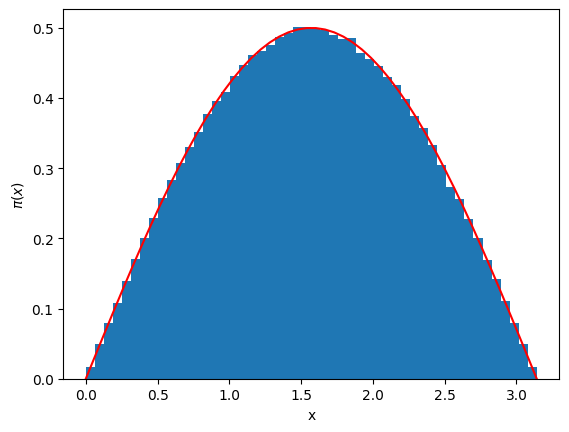

In [15]:
plt.figure()
plt.hist(results, bins=50, density=True)
x = np.linspace(0, np.pi)
plt.plot(x, (1/2)*np.sin(x), c="r")
plt.xlabel("x")
plt.ylabel(r"$\pi(x)$")
plt.show()